## Моя домашечька

### Prelude

In [14]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

# default figure size
plt.rcParams['figure.figsize'] = (12, 7)

### Загрузить

In [15]:
anime = pd.read_csv("data/anime_data.csv")
anime["aired_from"] = anime["aired_from"].apply(pd.to_datetime)
anime["aired_to"] = anime["aired_to"].apply(pd.to_datetime)
anime["aired_to"].fillna(anime["aired_from"], inplace = True)
anime.dropna(subset = ["aired_from"], inplace = True)

anime["title_english"].fillna(anime["title"], inplace = True)

anime.drop(labels = ["mal_id", "rank", "synopsis"], axis = 1, inplace = True)

def month_to_season(month: int) -> str:
    if (3 <= month) & (month <= 5):
        return "Spring"
    elif (6 <= month) & (month <= 8):
        return "Summer"
    elif (9 <= month) & (month <= 11):
        return "Fall"
    else:
        return "Winter"

def format_premiered(date) -> str:
    return "%s %d" % (month_to_season(date.month), date.year)

anime["premiered"] = anime["premiered"].fillna(
    anime["aired_from"].apply(format_premiered))

anime.head(3)

,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rating,score,scored_by,source,status,studios,title,title_english,type
0,1998-04-03 00:00:00+00:00,1999-04-24 00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]",Cowboy Bebop,Cowboy Bebop,TV
1,2001-04-04 00:00:00+00:00,2001-06-27 00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1978-03-14 00:00:00+00:00,1979-02-13 00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV


In [16]:
user = pd.read_csv("data/user_data.csv").dropna()
user["birthday"] = user["birthday"].apply(pd.to_datetime)
user = user.loc[user["birthday"].dt.year > 1980]
user.head(3)

,name,planning,watched,completed,days_watched,dropped,episodes_watched,mean_score,on_hold,plan_to_watch,rewatched,total_entries,watching,birthday,gender,joined,last_online,location,favorites,genre_count
2,-Hentai,"[{'mal_id': 39783, 'title': '5-toubun no Hanay...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",887,270.4,60,16189,7.36,9,88,8,1070,26,1991-11-05 00:00:00+00:00,Male,2014-05-19T00:00:00+00:00,2020-09-21 19:11:28+00:00,UAE - Sharjah,"{'anime': [{'mal_id': 31933, 'title': 'JoJo no...","{'Action': 418, 'Adventure': 210, 'Cars': 1, '..."
5,-Kurosawa-,"[{'mal_id': 38749, 'title': 'Blade Runner: Bla...","[{'title': '""0""', 'mal_id': 20707, 'score': 0,...",594,201.2,12,12248,5.42,5,13,34,651,27,2000-05-05 00:00:00+00:00,Male,2016-12-11T00:00:00+00:00,2020-09-20 12:52:00+00:00,Wired,"{'anime': [], 'characters': [], 'people': []}","{'Action': 301, 'Adventure': 152, 'Cars': 3, '..."
7,-Mahiru-,"[{'mal_id': 19429, 'title': 'Akuma no Riddle'}...",[{'title': '30-pun de Wakaru! Kore made no Lov...,227,44.7,9,2799,7.96,3,81,11,325,5,2003-02-04 00:00:00+00:00,Female,2017-06-15T00:00:00+00:00,2020-09-25 20:23:22+00:00,Hanazono Land,"{'anime': [{'mal_id': 9253, 'title': 'Steins;G...","{'Action': 56, 'Adventure': 20, 'Cars': 0, 'Co..."


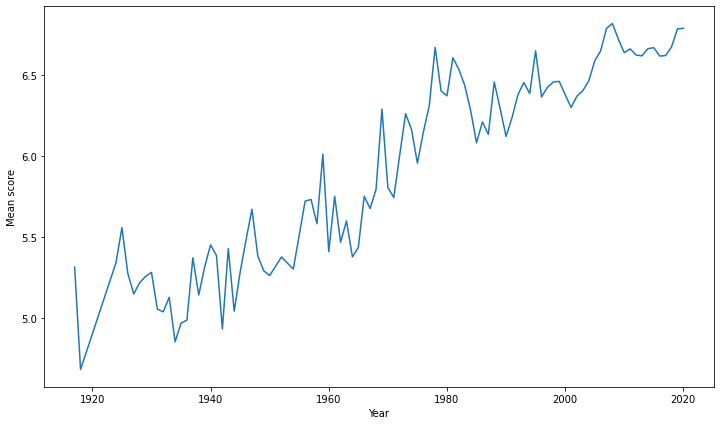

In [17]:
data = pd.DataFrame({
    "year": anime["aired_from"].apply(pd.to_datetime).dt.year,
    "score": anime["score"]})
data = data.groupby(data["year"]).mean()
plt.plot(data["score"])
plt.xlabel("Year")
plt.ylabel("Mean score")
plt.show()

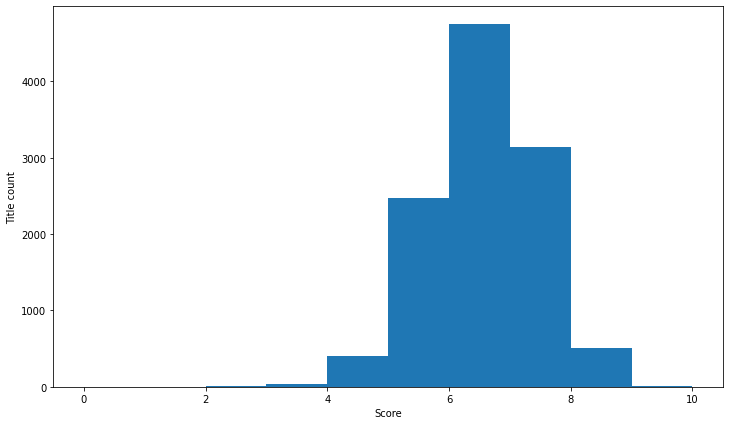

In [18]:
plt.hist(anime["score"], bins = 10, range = (0, 10))
plt.xlabel("Score")
plt.ylabel("Title count")
plt.show()

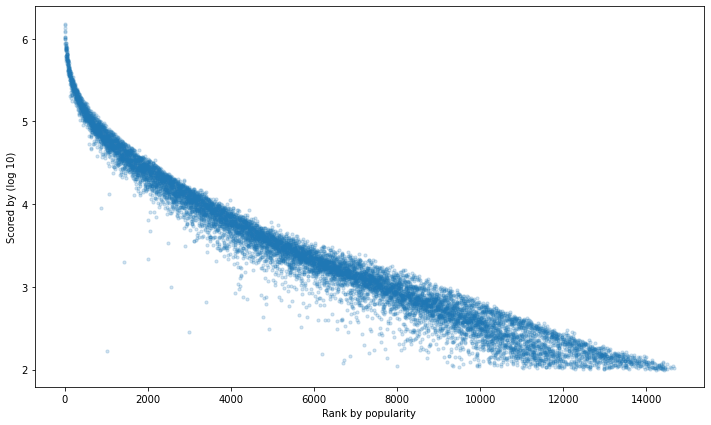

In [19]:
plt.scatter(
    anime["popularity"],
    anime["scored_by"].apply(np.log10),
    s = 10,
    alpha = 0.2)
plt.xlabel("Rank by popularity")
plt.ylabel("Scored by (log 10)")
plt.show()

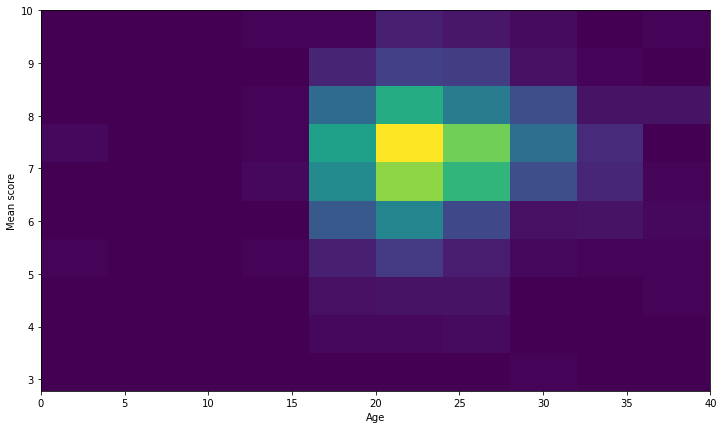

In [20]:
curr_year = pd.Timestamp.now().year
data = user[["birthday", "mean_score"]].loc[user["mean_score"] > 0]
plt.hist2d(
    curr_year - data["birthday"].dt.year,
    data["mean_score"]
)
plt.xlabel("Age")
plt.ylabel("Mean score")
plt.show()

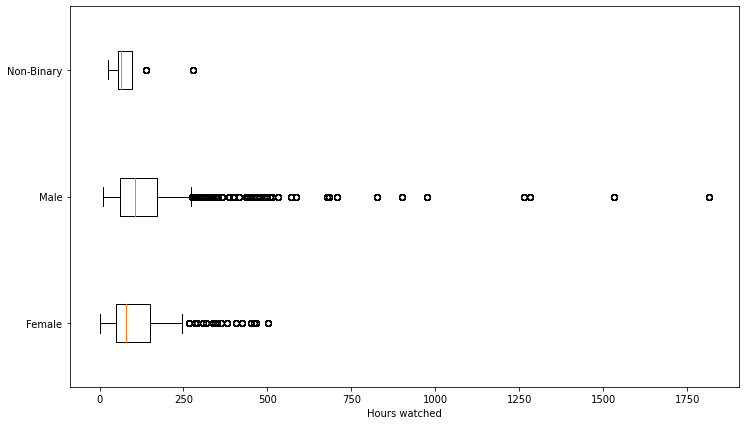

In [21]:
data = user[["gender", "days_watched"]]
grouped = data.groupby(data["gender"])["days_watched"].apply(list)
plt.boxplot(
    grouped * 24,
    labels = grouped.keys(),
    whis = 0.95,
    vert = False)
plt.xlabel("Hours watched")
plt.show()

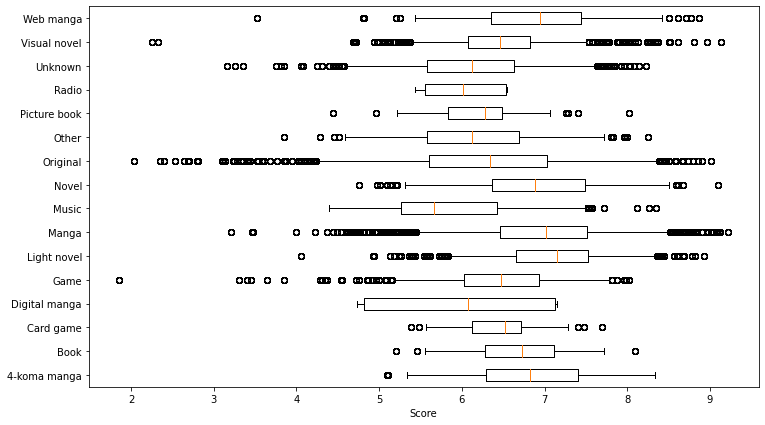

In [22]:
data = anime[["source", "score"]]
grouped = data.groupby(data["source"])["score"].apply(list)
plt.boxplot(
    grouped * 24,
    labels = grouped.keys(),
    whis = 0.95,
    vert = False)
plt.xlabel("Score")
plt.show()

In [23]:
anime.head(5)

,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rating,score,scored_by,source,status,studios,title,title_english,type
0,1998-04-03 00:00:00+00:00,1999-04-24 00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]",Cowboy Bebop,Cowboy Bebop,TV
1,2001-04-04 00:00:00+00:00,2001-06-27 00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1978-03-14 00:00:00+00:00,1979-02-13 00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,2008-01-01 00:00:00+00:00,2008-01-01 00:00:00+00:00,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,Winter 2008,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],Kago Shintarou Anime Sakuhin Shuu,Kago Shintarou Anime Sakuhin Shuu,OVA
4,2007-03-31 00:00:00+00:00,2007-03-31 00:00:00+00:00,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,Spring 2007,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",Tetsujin 28-gou: Hakuchuu no Zangetsu,Tetsujin 28-gou: Hakuchuu no Zangetsu,Movie


In [24]:
anime.to_csv("data/modified_anime.csv")

In [25]:
import re

def as_int_or_zero(match) -> int:
    if match:
        return int(match[1])
    else:
        return 0

def into_minutes(as_str: str) -> int:
    hours = as_int_or_zero(re.search(r"(\d+) hr", as_str))
    minutes = as_int_or_zero(re.search(r"(\d+) min", as_str))
    return hours * 60 + minutes

anime["total_duration"] = anime["duration"].apply(into_minutes) * anime["episodes"]
anime.head(5)

,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rating,score,scored_by,source,status,studios,title,title_english,type,total_duration
0,1998-04-03 00:00:00+00:00,1999-04-24 00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]",Cowboy Bebop,Cowboy Bebop,TV,624
1,2001-04-04 00:00:00+00:00,2001-06-27 00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV,299
2,1978-03-14 00:00:00+00:00,1979-02-13 00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV,1050
3,2008-01-01 00:00:00+00:00,2008-01-01 00:00:00+00:00,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,Winter 2008,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],Kago Shintarou Anime Sakuhin Shuu,Kago Shintarou Anime Sakuhin Shuu,OVA,30
4,2007-03-31 00:00:00+00:00,2007-03-31 00:00:00+00:00,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,Spring 2007,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",Tetsujin 28-gou: Hakuchuu no Zangetsu,Tetsujin 28-gou: Hakuchuu no Zangetsu,Movie,95
